In [1]:
#data loading
import pandas as pd
filename="/content/mortgages.csv"
a=pd.read_csv(str(filename))

print(a)

        rownames             bpl  qob  nonwhite  vet_wwko  home_ownership  \
0              1        Colorado    1         0         1               1   
1              2           Texas    1         0         0               0   
2              3       Minnesota    1         0         1               1   
3              4        New York    1         0         1               1   
4              5        Illinois    1         0         1               0   
...          ...             ...  ...       ...       ...             ...   
214139    214140        Oklahoma    4         0         0               0   
214140    214141        Colorado    4         0         0               0   
214141    214142        New York    4         0         0               0   
214142    214143        Nebraska    4         0         0               1   
214143    214144  North Carolina    4         1         0               0   

        qob_minus_kw  
0              -54.5  
1              -54.5  
2     

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
bpl,0
qob,0
nonwhite,0
vet_wwko,0
home_ownership,0
qob_minus_kw,0


In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="qob_minus_kw"

#transform string into int
transformColumns={1}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

        rownames  bpl  qob  nonwhite  vet_wwko  home_ownership  qob_minus_kw
0              1    5    0         0         1               1         -54.5
1              2   43    0         0         0               0         -54.5
2              3   23    0         0         1               1         -54.5
3              4   32    0         0         1               1         -54.5
4              5   13    0         0         1               0         -54.5
...          ...  ...  ...       ...       ...             ...           ...
214139    214140   36    3         0         0               0          28.5
214140    214141    5    3         0         0               0          28.5
214141    214142   32    3         0         0               0          28.5
214142    214143   27    3         0         0               1          28.5
214143    214144   33    3         1         0               0          28.5

[214144 rows x 7 columns]


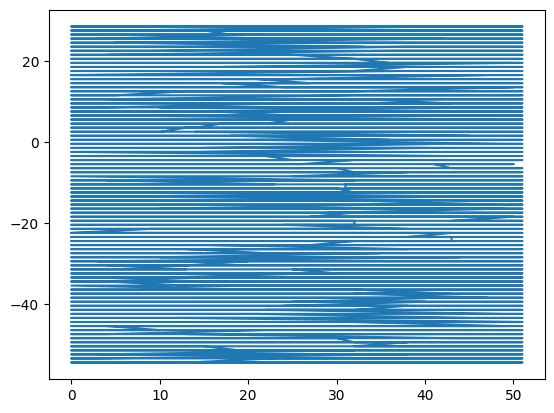

In [9]:
from matplotlib import pyplot as plt

index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 214144 artists>

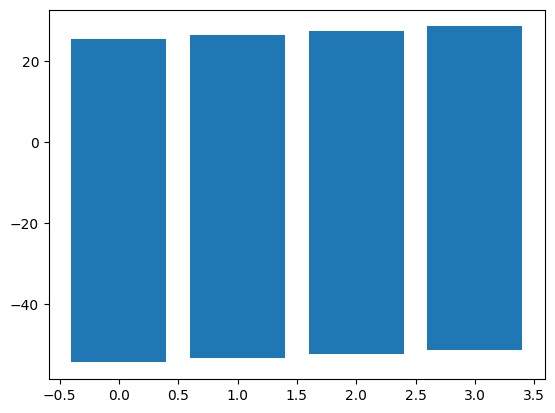

In [10]:
plt.bar(a[a.columns[2]],a[str(target)])

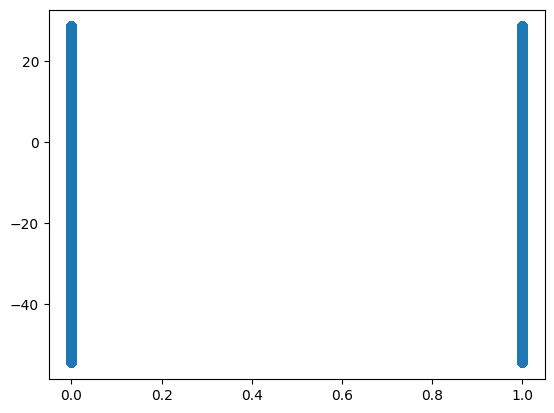

In [11]:
plt.scatter(a[a.columns[3]], a[str(target)])

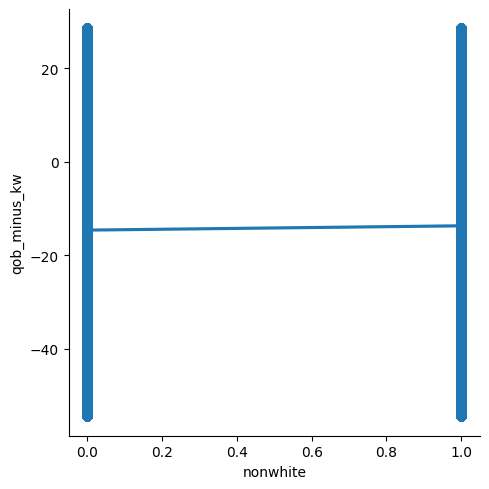

In [14]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="nonwhite",y=str(target),data=a)

<Axes: xlabel='vet_wwko', ylabel='qob_minus_kw'>

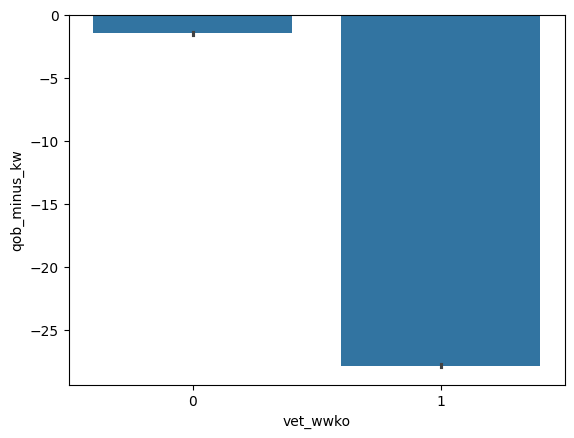

In [15]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='home_ownership', ylabel='qob_minus_kw'>

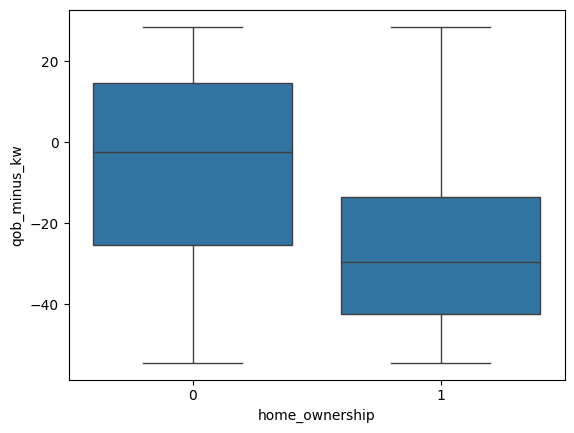

In [17]:
sns.boxplot(x=a.columns[5],y=str(target),data=a)

<ipython-input-18-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='qob_minus_kw', ylabel='Density'>

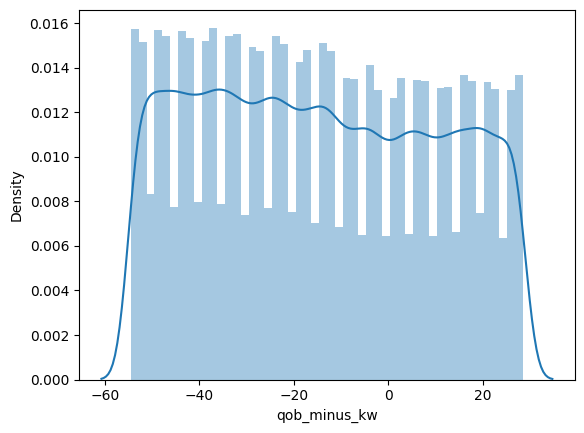

In [18]:
sns.distplot(a[str(target)])

<Axes: xlabel='nonwhite', ylabel='Density'>

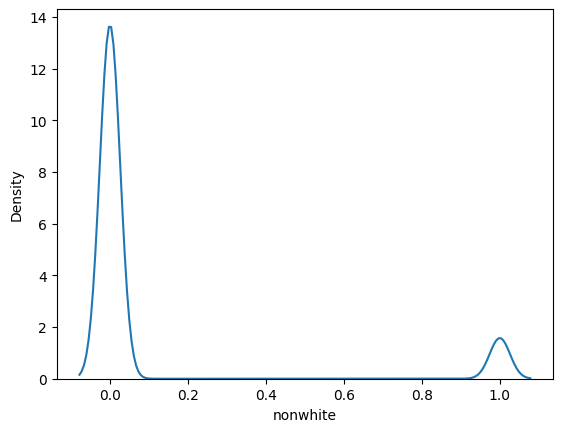

In [19]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='qob', ylabel='count'>

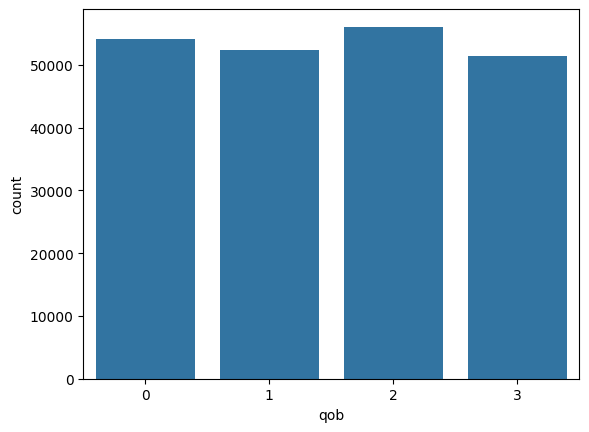

In [20]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

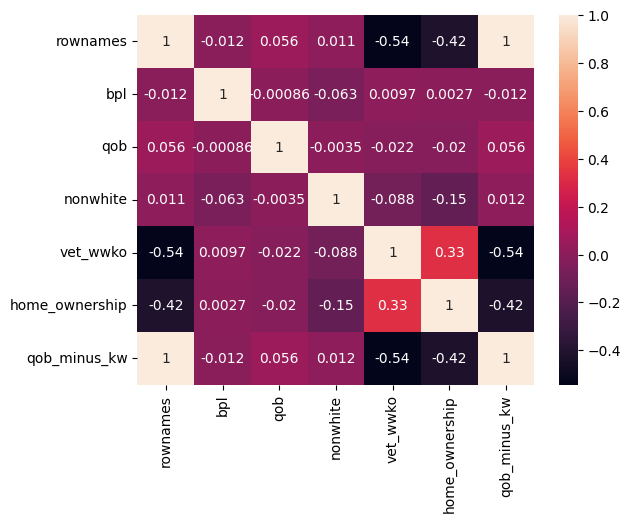

In [21]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

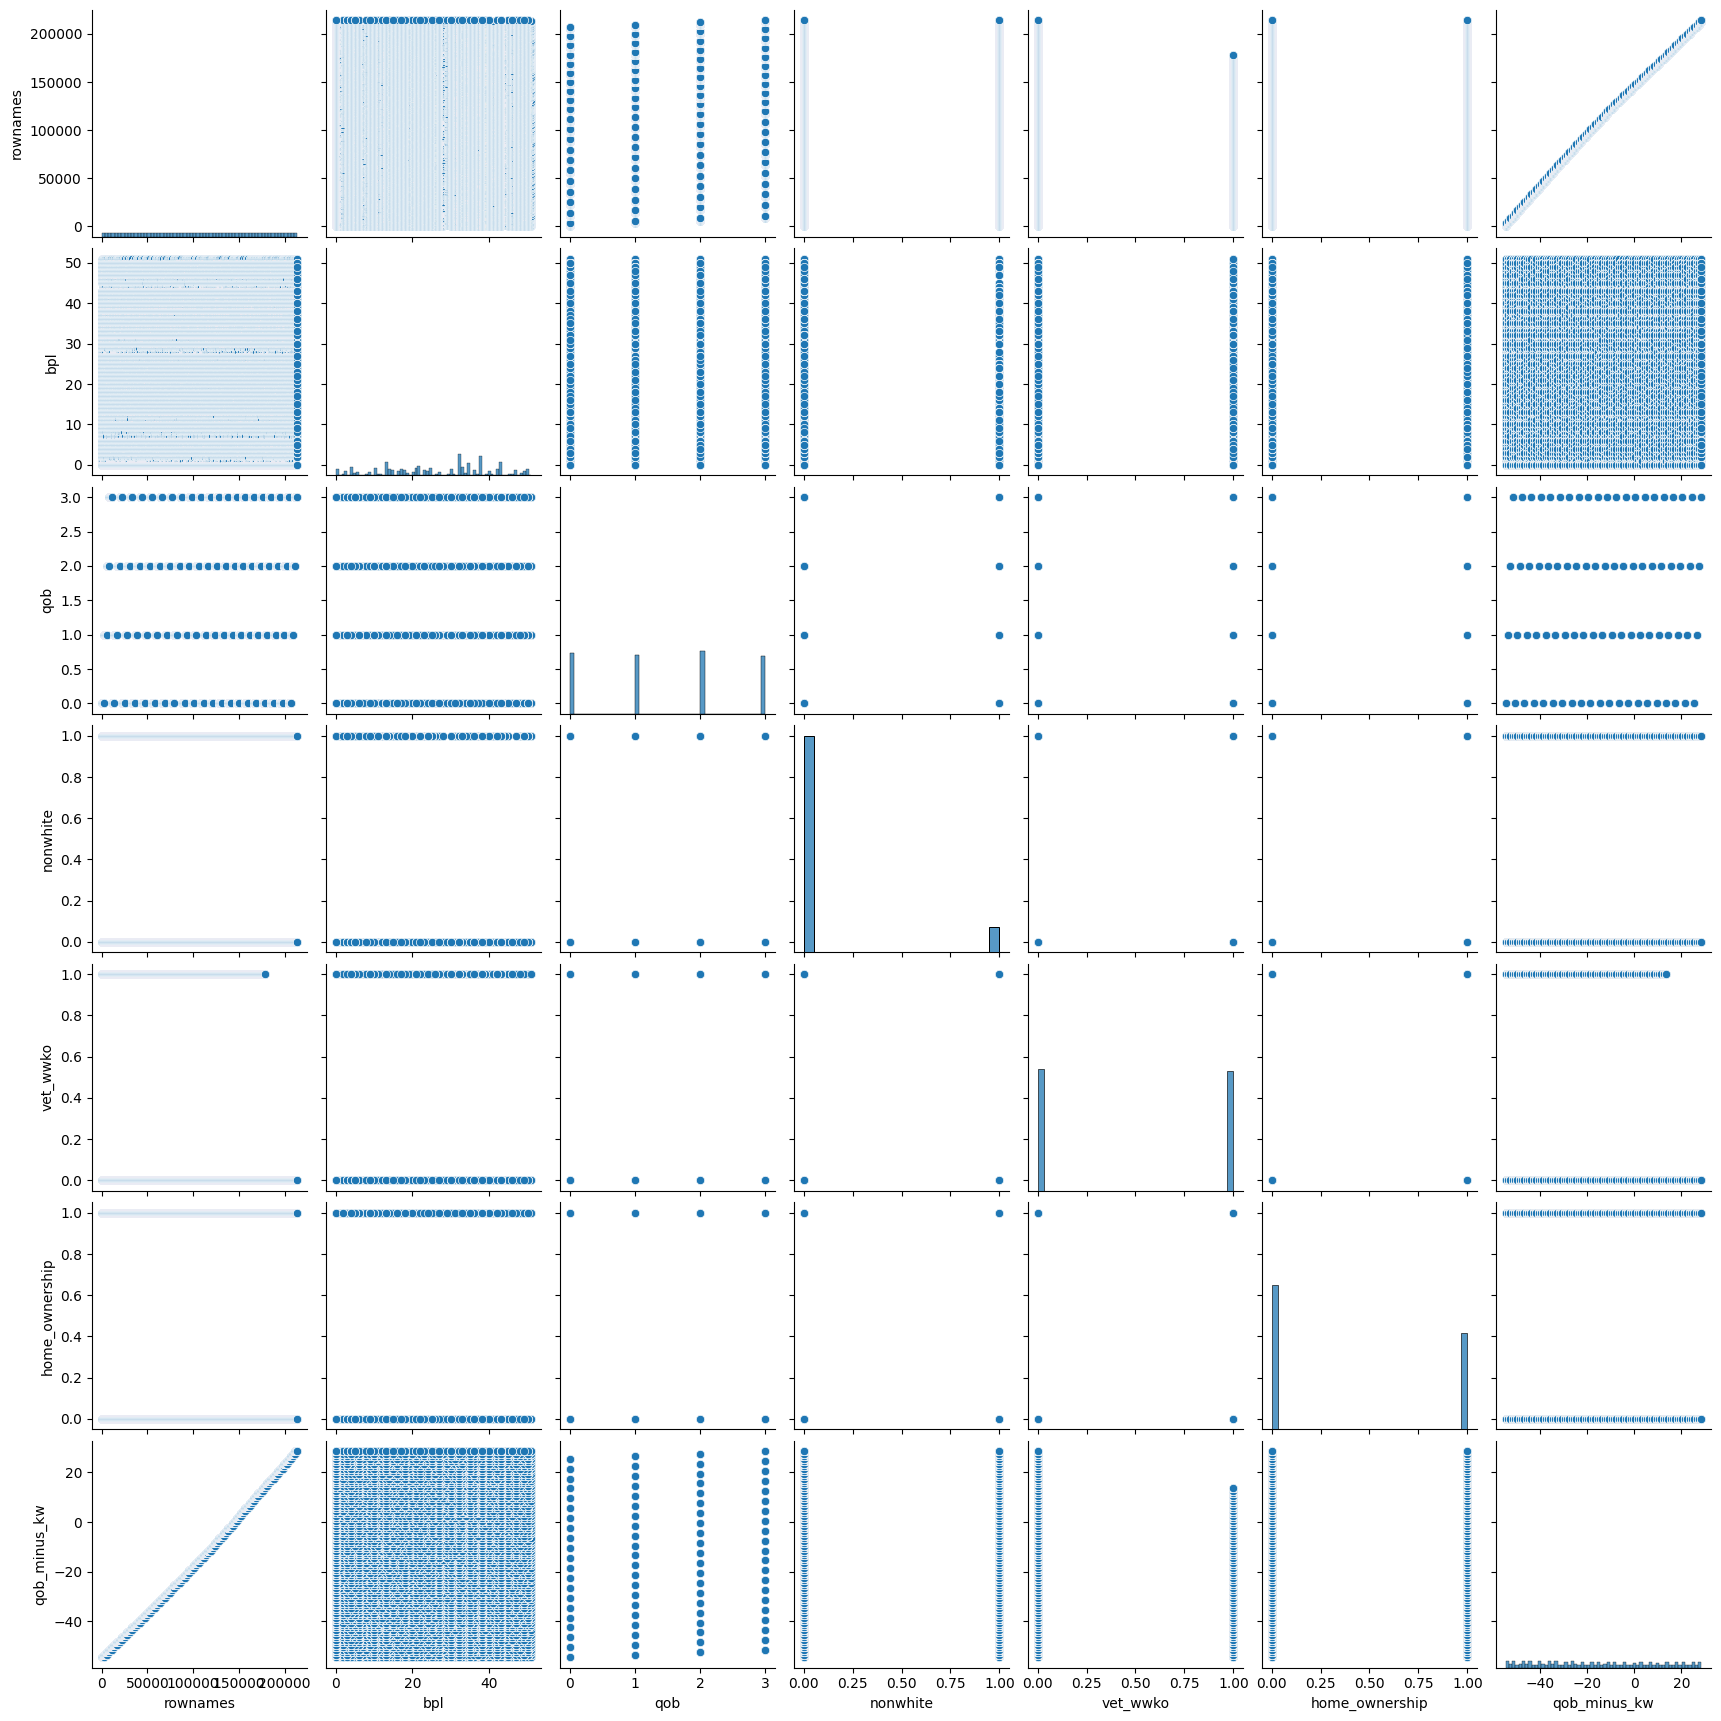

In [22]:
sns.pairplot(data=a)

In [23]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

        rownames  bpl  qob  nonwhite  vet_wwko  home_ownership
0              1    5    0         0         1               1
1              2   43    0         0         0               0
2              3   23    0         0         1               1
3              4   32    0         0         1               1
4              5   13    0         0         1               0
...          ...  ...  ...       ...       ...             ...
214139    214140   36    3         0         0               0
214140    214141    5    3         0         0               0
214141    214142   32    3         0         0               0
214142    214143   27    3         0         0               1
214143    214144   33    3         1         0               0

[214144 rows x 6 columns]


In [24]:
print(y)

0        -54.5
1        -54.5
2        -54.5
3        -54.5
4        -54.5
          ... 
214139    28.5
214140    28.5
214141    28.5
214142    28.5
214143    28.5
Name: qob_minus_kw, Length: 214144, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
print(x_train)

        rownames  bpl  qob  nonwhite  vet_wwko  home_ownership
143611    143612   16    2         0         1               0
24458      24459   32    0         0         1               0
9323        9324   32    3         0         1               0
213550    213551   18    3         0         0               0
106371    106372   18    3         0         0               0
...          ...  ...  ...       ...       ...             ...
188936    188937   32    1         0         0               1
62318      62319   22    2         0         1               1
155069    155070   22    3         0         0               0
112984    112985   33    1         1         0               0
160895    160896   35    1         0         0               0

[171315 rows x 6 columns]


In [27]:
print(y_train)

143611    -0.5
24458    -46.5
9323     -51.5
213550    28.5
106371   -15.5
          ... 
188936    18.5
62318    -32.5
155069     4.5
112984   -13.5
160895     6.5
Name: qob_minus_kw, Length: 171315, dtype: float64


In [28]:
print(x_test)

        rownames  bpl  qob  nonwhite  vet_wwko  home_ownership
49112      49113   14    1         0         1               1
159277    159278   32    0         0         0               0
112062    112063   35    1         0         1               0
85656      85657   43    3         0         1               1
68261      68262    9    0         0         1               1
...          ...  ...  ...       ...       ...             ...
47142      47143   38    1         0         1               1
70874      70875   50    1         0         1               1
129029    129030   21    0         0         1               1
18574      18575   43    2         0         1               1
44994      44995   43    0         0         1               1

[42829 rows x 6 columns]


In [29]:
print(y_test)

49112    -37.5
159277     5.5
112062   -13.5
85656    -23.5
68261    -30.5
          ... 
47142    -37.5
70874    -29.5
129029    -6.5
18574    -48.5
44994    -38.5
Name: qob_minus_kw, Length: 42829, dtype: float64


In [30]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [31]:
print(ypred)

[-37.47365641   6.10553669 -12.76503533 ...  -6.29488521 -49.40335172
 -39.07897407]


In [33]:
print(model.predict([[49113,14,1,0,1,1]]))

[-37.47365641]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [35]:
print(ypred)

[-37.5   5.5 -13.5 ...  -6.5 -48.5 -38.5]


In [36]:
print(model.predict([[49113,14,1,0,1,1]]))

[-37.47365641]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[-37.5   5.5 -13.5 ...  -6.5 -48.5 -38.5]


In [39]:
print(model.predict([[49113,14,1,0,1,1]]))

[-37.47365641]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
